In [3]:
using SparseArrays
using LinearAlgebra
using Plots

[101, 201]
0.9999745737072947


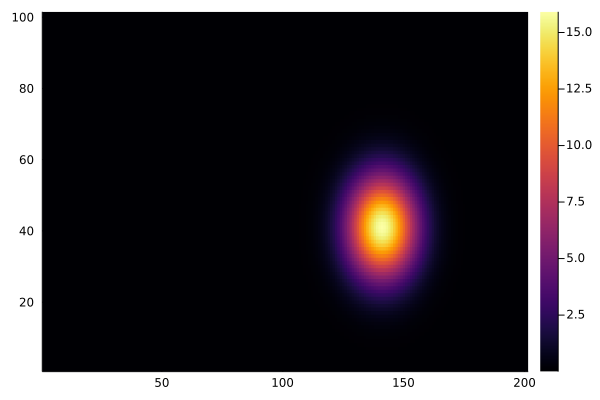

In [31]:
dx = 0.01

Ly = 1
Lx = 2

Ny = Int64(floor(Ly/dx)) + 1
Nx = Int64(floor(Lx/dx)) + 1

println([Ny; Nx])
x0 = zeros(Nx*Ny)

mu = [1.4; 0.4]
sigma = 0.1
for k = 1:Nx*Ny
    i = Int64(ceil(k/Ny))
    j = k - Ny*(i-1)
    #println([k, i, j])
    x0[k] = exp(-((dx*(i-1)-mu[1])^2+(dx*(j-1)-mu[2])^2)/2/sigma^2)/(2*pi)/sigma^2
end
sum1 = sum(x0)*dx*dx
println(sum1)
heatmap(reshape(x0, Ny, Nx))


In [24]:
x = copy(x0)
boundary = "b1b"
id1 = Array{Int64,1}()
id2 = Array{Int64,1}()
v = Array{Float64,1}()   
#Threads.@threads for k in 1:Nx*Ny
for k in 2:N-1
    append!(id1, k)
    append!(id2, k)
    append!(v, -2.0)
    append!(id1, k)
    append!(id2, k-1)
    append!(v, 1.0)
    append!(id1, k)
    append!(id2, k+1)
    append!(v, 1.0)
end

if(boundary == "b1")
    append!(id1, 1)
    append!(id2, 1)
    append!(v, -2.0)
    append!(id1, 1)
    append!(id2, 2)
    append!(v, 2.0)

    append!(id1, N)
    append!(id2, N)
    append!(v, -2.0)
    append!(id1, N)
    append!(id2, N-1)
    append!(v, 2.0)
    
elseif(boundary == "b1b")
    append!(id1, 1)
    append!(id2, 1)
    append!(v, -1.0)
    append!(id1, 1)
    append!(id2, 2)
    append!(v, 1.0)

    append!(id1, N)
    append!(id2, N)
    append!(v, -1.0)
    append!(id1, N)
    append!(id2, N-1)
    append!(v, 1.0)
    
elseif(boundary == "b2")
    append!(id1, 1)
    append!(id2, 1)
    append!(v, -7.0/2)
    append!(id1, 1)
    append!(id2, 2)
    append!(v, 4.0)
    append!(id1, 1)
    append!(id2, 3)
    append!(v, -0.5)

    append!(id1, N)
    append!(id2, N)
    append!(v, -7.0/2)
    append!(id1, N)
    append!(id2, N-1)
    append!(v, 4.0)
    append!(id1, N)
    append!(id2, N-2)
    append!(v, -0.5)        
else
    println("asdf")
end



xi = sparse(id1, id2, v, N, N)


tau = 10
Niter = 100
I = sparse(1:N, 1:N, ones(N))
A = 2.0 .* I - tau .* xi
B = 2.0 .* I + tau .* xi

#A = I - tau .* xi


for t in 1:Niter
    x = A \ (B * x ) #way slower when dx -> 0
    #x = A \ x
    #gmres!(x, A , B * x)
end
A = Array{Float64,2}(xi)

LoadError: UndefVarError: N not defined

1.0880201825225279e-14


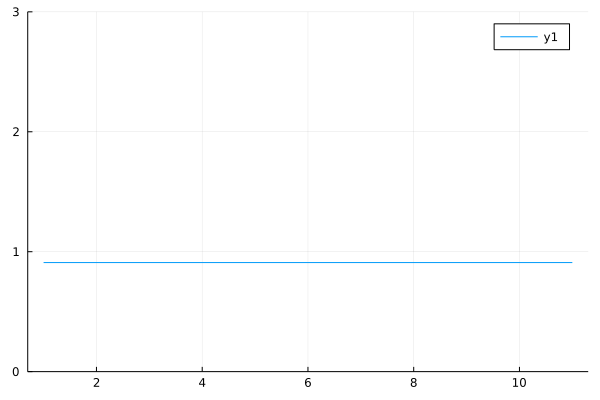

In [30]:
println(abs(sum(x)*dx-sum1)/sum1)
plot(x,ylim=(0.,3.0))

In [14]:
println(abs(sum(x)*dx-sum1)/sum1)

1.0643583677743214e-8
